#PhlyGreen Tutorial 

Import packages

In [1]:
import sys
sys.path.insert(0,'../')
import PhlyGreen as pg
import numpy as np
import matplotlib.pyplot as plt
import PhlyGreen.Utilities.Units as Units
#import scienceplots

#plt.style.use(['science', 'ieee', 'high-vis'])



Create instances of subsystems. Each one of those requires an Aircraft object as argument. By passing (None) as argument, we are creating empty objects (for the moment).

In [2]:
powertrain = pg.Systems.Powertrain.Powertrain(None)
structures = pg.Systems.Structures.Structures(None)
aerodynamics = pg.Systems.Aerodynamics.Aerodynamics(None)
performance = pg.Performance.Performance(None)
mission = pg.Mission.Mission(None)
weight = pg.Weight.Weight(None)
constraint = pg.Constraint.Constraint(None)
welltowake = pg.WellToWake.WellToWake(None)
battery = pg.Systems.Battery.Battery(None)
climateimpact = pg.ClimateImpact.ClimateImpact(None)

Create instance of Aircraft object.

In [3]:
myaircraft = pg.Aircraft(powertrain, structures, aerodynamics, performance, mission, weight, constraint, welltowake, battery, climateimpact)

Create the connections with its subsystems.

In [4]:
powertrain.aircraft = myaircraft
structures.aircraft = myaircraft
aerodynamics.aircraft = myaircraft
mission.aircraft = myaircraft
performance.aircraft = myaircraft
weight.aircraft = myaircraft
constraint.aircraft = myaircraft
welltowake.aircraft = myaircraft
battery.aircraft = myaircraft
climateimpact.aircraft = myaircraft

Define input dictionaries

In [5]:
ConstraintsInput = {'DISA': 0.,
                    'Cruise': {'Speed': 0.5, 'Speed Type':'Mach', 'Beta': 0.95, 'Altitude': 8000.},
                    'AEO Climb': {'Speed': 210, 'Speed Type':'KCAS', 'Beta': 0.97, 'Altitude': 6000., 'ROC': 5},
                    'OEI Climb': {'Speed': 1.2*34.5, 'Speed Type': 'TAS', 'Beta': 1., 'Altitude': 0., 'Climb Gradient': 0.021},
                    'Take Off': {'Speed': 90, 'Speed Type': 'TAS', 'Beta': 1., 'Altitude': 100., 'kTO': 1.2, 'sTO': 950},
                    'Landing':{'Speed': 59., 'Speed Type': 'TAS', 'Altitude': 500.},
                    'Turn':{'Speed': 210, 'Speed Type': 'KCAS', 'Beta': 0.9, 'Altitude': 5000, 'Load Factor': 1.1},
                    'Ceiling':{'Speed': 0.5, 'Beta': 0.8, 'Altitude': 9500, 'HT': 0.5},
                    'Acceleration':{'Mach 1': 0.3, 'Mach 2':0.4, 'DT': 180, 'Altitude': 6000, 'Beta': 0.9}}

In [6]:
MissionInput = {'Range Mission': 750,  #nautical miles
                'Range Diversion': 220,  #nautical miles
                'Beta start': 0.97,
                'Payload Weight': 4560,  #Kg
                'Crew Weight': 500}  #Kg

In [7]:
MissionStages = {'Takeoff': {'Supplied Power Ratio':{'phi': 0.}},
                'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.16, 'Speed': 77, 'StartAltitude': 100, 'EndAltitude': 1500}, 'Supplied Power Ratio':{'phi_start': 0, 'phi_end':0.2}},
                 'Climb2': {'type': 'ConstantRateClimb', 'input': {'CB': 0.08, 'Speed': 120, 'StartAltitude': 1500, 'EndAltitude': 4500}, 'Supplied Power Ratio':{'phi_start': 0.2, 'phi_end':0.2 }},
                 'Climb3': {'type': 'ConstantRateClimb', 'input': {'CB': 0.07, 'Speed': 125, 'StartAltitude': 4500, 'EndAltitude': 8000}, 'Supplied Power Ratio':{'phi_start': 0.2, 'phi_end':0.2 }},
                 'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.4, 'Altitude': 8000}, 'Supplied Power Ratio':{'phi_start': 0.5, 'phi_end':0.5}},
                 'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.04, 'Speed': 90, 'StartAltitude': 8000, 'EndAltitude': 200}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}

DiversionStages = {'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.08, 'Speed': 110, 'StartAltitude': 200, 'EndAltitude': 3100}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.35, 'Altitude': 3100}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0}},
                 'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.04, 'Speed': 90, 'StartAltitude': 3100, 'EndAltitude': 200}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}


In [19]:
EnergyInput = {'Ef': 43.5*10**6,
                   'Contingency Fuel': 130,
                   'Ebat': 700 * 3600,
                   'pbat': 1000,
                   'Eta Gas Turbine': 0.22,
                   'Eta Gearbox': 0.96,
                   'Eta Propulsive': 0.8,
                   'Eta Electric Motor 1': 0.96,    #for serial config
                   'Eta Electric Motor 2': 0.96,    #for serial config
                   'Eta Electric Motor': 0.98,      #for parallel config
                   'Eta PMAD': 0.99,
                   'Specific Power Powertrain': [3900,7700],
                   'Specific Power PMAD': [2200,2200,2200],
                   'PowertoWeight Battery': 35, 
                   'PowertoWeight Powertrain': [150,33],
                   'PowertoWeight PMAD': 0
                   }

In [9]:
CellInput = {
    'Class': "II",
    'Model':'Finger-Cell-Thermal',
    'SpecificPower': 8000,
    'SpecificEnergy': 1500,
    'Minimum SOC': 0.2,
    'Pack Voltage':800,
    'Initial temperature': 25,
    'Max operative temperature':50,
    'Ebat': 1000 * 3600, # PhlyGreen uses this input only if Class == 'I'
    'pbat': 1000
    }

In [ ]:
AerodynamicsInput = {'AnalyticPolar': {'type': 'Quadratic', 'input': {'AR': 11, 'e_osw': 0.8}},
                    'Take Off Cl': 1.9,
                     'Landing Cl': 1.9,
                     'Minimum Cl': 0.20,
                     'Cd0': 0.017}


In [11]:
WellToTankInput = {'Eta Charge': 0.95,
                   'Eta Grid': 1.,
                   'Eta Extraction': 1.,
                   'Eta Production': 1.,
                   'Eta Transportation': 0.25}

ClimateImpactInput = {'H': 100, 'N':1.6e7, 'Y':30, 'EINOx_model':'Filippone', 'WTW_CO2': 8.30e-3, 'Grid_CO2': 9.36e-2}

Import input dictionaries

In [20]:
myaircraft.ConstraintsInput = ConstraintsInput
myaircraft.AerodynamicsInput = AerodynamicsInput
myaircraft.MissionInput = MissionInput
myaircraft.MissionStages = MissionStages
myaircraft.DiversionStages = DiversionStages
myaircraft.EnergyInput = EnergyInput
myaircraft.CellInput = CellInput
myaircraft.WellToTankInput = WellToTankInput
myaircraft.ClimateImpactInput = ClimateImpactInput
myaircraft.PropellerInput = PropellerInput

Set aircraft power configuration

In [25]:
myaircraft.Configuration = 'Hybrid'
# myaircraft.Configuration = 'Traditional'
myaircraft.HybridType = 'Parallel'
myaircraft.AircraftType = 'TwinTP'

Set inputs

In [26]:
# Initialize Constraint Analysis
myaircraft.constraint.SetInput()

# Initialize Mission profile and Analysis
myaircraft.mission.InitializeProfile()
myaircraft.mission.SetInput()

# Initialize Aerodynamics subsystem
myaircraft.aerodynamics.SetInput()

# Initialize Powertrain
myaircraft.powertrain.SetInput()

# Initialize Weight Estimator
myaircraft.weight.Class = 'I'

myaircraft.weight.SetInput()

#Initialize Battery Configurator
myaircraft.battery.SetInput()

#Initialized Well to Tank
myaircraft.welltowake.SetInput()

# Initialize Climate Impace Estimator
myaircraft.climateimpact.SetInput()

Either run the Constraint Analysis....

In [27]:
myaircraft.constraint.FindDesignPoint()
print('----------------------------------------')
print('Design W/S: ',myaircraft.DesignWTOoS)
print('Design P/W: ',myaircraft.DesignPW)
print('----------------------------------------')

----------------------------------------
Design W/S:  3293.8228228228227
Design P/W:  194.90567908431782
----------------------------------------


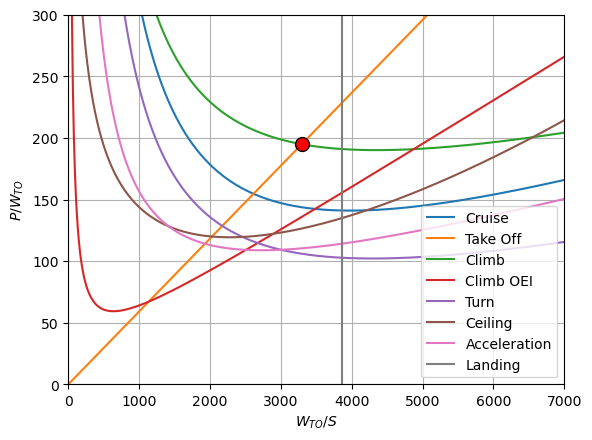

In [17]:
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWCruise, label='Cruise')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWTakeOff, label='Take Off')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWAEOClimb, label='Climb')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWOEIClimb, label='Climb OEI')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWTurn, label='Turn')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWCeiling, label='Ceiling')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWAcceleration, label='Acceleration')
plt.plot(myaircraft.constraint.WTOoSLanding,myaircraft. constraint.PWLanding, label='Landing')
plt.plot(myaircraft.DesignWTOoS, myaircraft.DesignPW, marker='o', markersize = 10, markerfacecolor = 'red', markeredgecolor = 'black')
# plt.plot(performance.WTOoSTorenbeek, performance.PWTorenbeek, label='Torenbeek')
plt.ylim([0, 300])
plt.xlim([0, 7000])
plt.legend()
plt.grid(visible=True)
plt.xlabel('$W_{TO}/S$')
plt.ylabel('$P/W_{TO}$')
plt.show()

... or assign a wing loading

In [18]:
# myaircraft.DesignWTOoS = 3323

Run Mission analysis to define the aircraft's masses

In [28]:
myaircraft.weight.WeightEstimation()

max=125 and min=124
Optimal n 125
max=729 and min=728
Optimal n 729
max=725 and min=724
Optimal n 725
max=723 and min=721
Optimal n 722
max=374 and min=372
Optimal n 373
max=241 and min=240
Optimal n 241
max=333 and min=331
Optimal n 332
max=328 and min=327
Optimal n 328
max=328 and min=327
Optimal n 328
max=328 and min=327
Optimal n 328
max=328 and min=327
Optimal n 328


Wing surface can be readily estimated as S = WTO/(WTO/S)

In [ ]:
myaircraft.WingSurface = myaircraft.weight.WTO / myaircraft.DesignWTOoS * 9.81

Well to tank impact is evaluated as a post-process

In [30]:
if (myaircraft.Configuration == 'Hybrid' and WellToTankInput is not None):
    myaircraft.welltowake.EvaluateSource()

A summary of the preliminary design:

In [31]:
myaircraft.Print_Aircraft_Design_Summary()

Fuel mass (trip + altn + loiter): 1660.9 [Kg]
Block Fuel mass:                  1790.9 [Kg]
Battery mass:                     4424.7 [Kg]
Structure:                        16887.7 [Kg]
Powertrain mass:                  2611.3 [Kg]
Empty Weight:                     24423.7 [Kg]
Zero Fuel Weight:                 28983.7 [Kg]
----------------------------------------
Takeoff Weight:                   30774.5 [Kg]
 
Source Energy:                    309724.5 [MJ]
Psi:                              0.0669 [-]
 
Wing Surface:                     91.7 [m^2]
 
TakeOff engine shaft peak power:  8201.0 [KW]
CLB/CRZ engine shaft peak power:  6829.5 [KW] @ 100.0 [m]
 
Sizing phase for thermal powertrain:  Takeoff peak power
Thermal powertrain rating shaft power SLS rating: 8201.0 [kW]
 
-------------Battery Specs-------------
Battery Pack Energy:               6637.1 [kWh]
Battery Pack Max Power:            35590.5 [kW]
Battery Pack Specific Energy:      1500.0 [Wh/kg]
Battery Pack Specific Power:  

Gathering datasetd for plots:

In [64]:
times = np.array([])
Ef    = np.array([])
Ebat  = np.array([])
beta  = np.array([])
soc   = np.array([])
temp  = np.array([])
for array in mission.integral_solution:
    times = np.concatenate([times, array.t])
    Ef    = np.concatenate([Ef   , array.y[0]])
    # Ebat  = np.concatenate([Ebat , array.y[1]])
    beta  = np.concatenate([beta , array.y[2]])
    temp  = np.concatenate([temp, array.y[-1]]) 

#print(len(beta))

toplot = np.array(mission.plottingVars)
soc   = toplot[:, 1]
v_oc  = toplot[:, 2]
v_out = toplot[:, 3]
curr  = toplot[:, 4]
temp  = toplot[:, 5]
atemp = toplot[:, 6]
alt   = toplot[:, 7]

Plotting battery instantaneous state in terms of state-of-charge and pack temperature

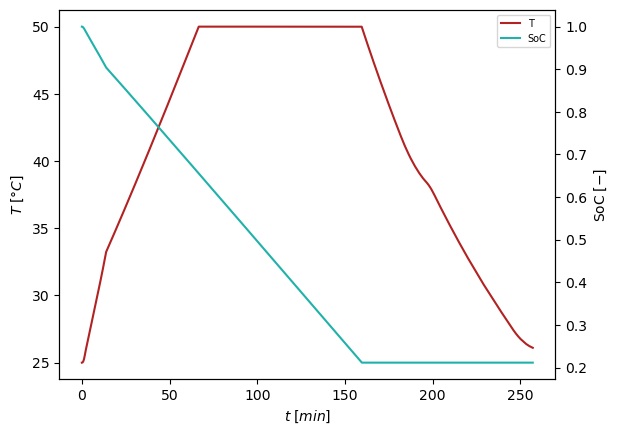

In [87]:
# plt.plot(times,temp-273.15)
# plt.xlabel('Time [s]')
# plt.ylabel('Battery temperature [C]')
# plt.show()

# plt.plot(times,soc)
# plt.xlabel('Time [s]')
# plt.ylabel('SoC [-]')

# Create figure and first axis
fig, ax1 = plt.subplots()

# Plot first variable
line1, = ax1.plot(times/60, temp-273.15, 'firebrick',label='T')
ax1.set_xlabel(r'$t \; [min]$')
ax1.set_ylabel(r'$T \; [\text{°}C]$', color='k')
ax1.tick_params(axis='y', labelcolor='k')

# plt.legend()
# Create second y-axis
ax2 = ax1.twinx()
line2, = ax2.plot(times/60, soc, 'lightseagreen',label='SoC')
ax2.set_ylabel(r"SoC$ \; [-]$", color='k')
ax2.tick_params(axis='y', labelcolor='k')

lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper right',fontsize=7)

plt.savefig('../outputs/temp_soc.png', dpi=600, bbox_inches='tight')


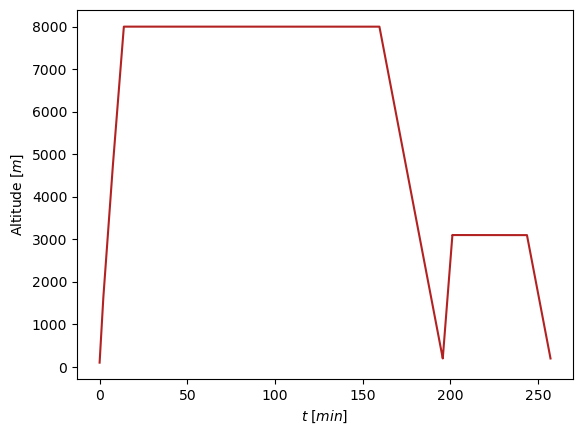

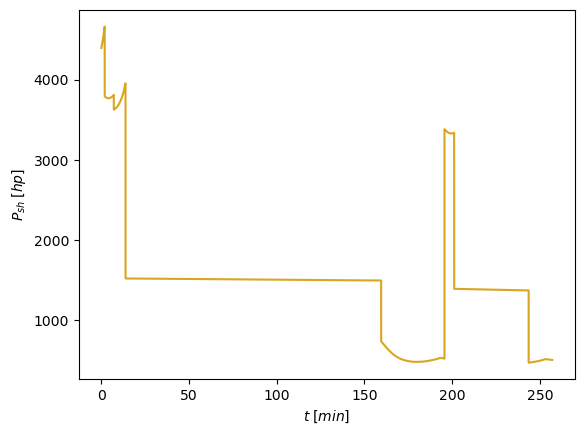

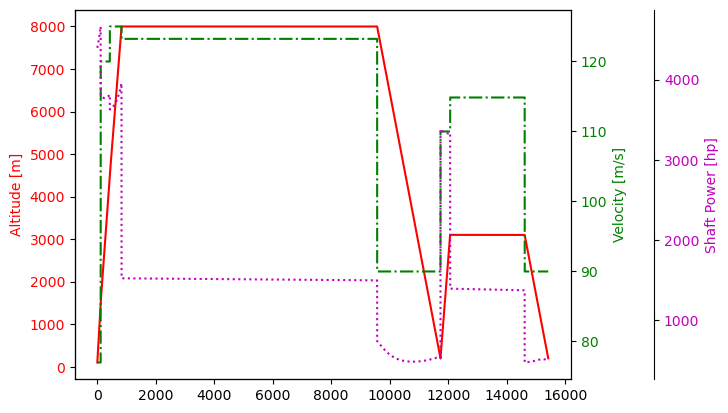

In [81]:
Alt = mission.profile.Altitude(times)
Velocity = mission.profile.Velocity(times) 
PP = [(myaircraft.weight.WTO) * myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS') for t in range(len(times))]
Phi = [mission.profile.SuppliedPowerRatio(t) for t in times]
PRatio = [powertrain.Hybrid(Phi[t],Alt[t],Velocity[t],PP[t]) for t in range(len(times))]


ShaftPower = [Units.wTohp(PP[t]/2)*PRatio[t][3] for t in range(len(times))]




plt.figure()
plt.plot(times/60, mission.profile.Altitude(times),color='firebrick')
plt.xlabel(r'$t \; [min]$')
plt.ylabel(r'Altitude$ \; [m]$')
plt.savefig('../outputs/Altitude.png', dpi=600, bbox_inches='tight')

plt.figure()
plt.plot(times/60, ShaftPower,color='goldenrod')
plt.xlabel(r'$t \; [min]$')
plt.ylabel(r'$P_{sh} \; [hp]$')
plt.savefig('../outputs/ShaftPower.png', dpi=600, bbox_inches='tight')


# Create figure and first axis
fig, ax1 = plt.subplots()

ax1.plot(times, mission.profile.Altitude(times), 'r')
ax1.set_ylabel("Altitude [m]", color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()
ax2.plot(times, Velocity, 'g-.')
ax2.set_ylabel("Velocity [m/s]", color='g')
ax2.tick_params(axis='y', labelcolor='g')

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))  # Offset the third axis
ax3.plot(times, ShaftPower, 'm:', label="cos(x)")
ax3.set_ylabel("Shaft Power [hp]", color='m')
ax3.tick_params(axis='y', labelcolor='m')
plt.savefig('../outputs/Altitude_Velocity_ShaftPower.png', dpi=600, bbox_inches='tight')

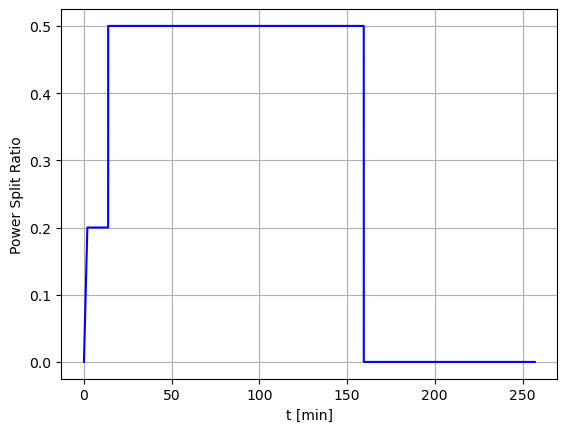

In [86]:
plt.plot(times/60,[mission.profile.SuppliedPowerRatio(t) for t in times], 'b')
#plt.plot(myaircraft.mission.profile.Breaks,np.ones(6)*0.05, '*')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Power Split Ratio')
plt.savefig('../outputs/PowerSplitRatio.png', dpi=600, bbox_inches='tight')

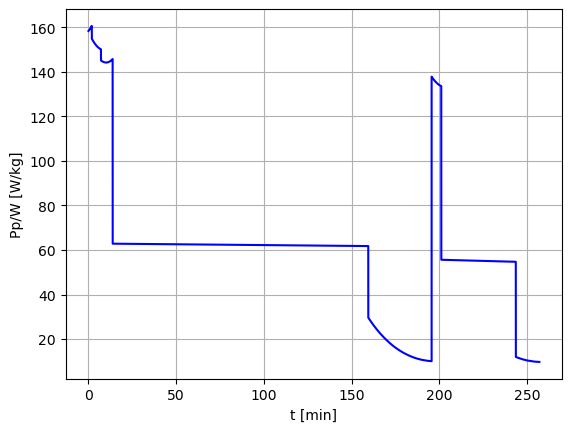

In [85]:
PPoW = [PP[t]/myaircraft.weight.WTO for t in range(len(times))]
plt.plot(times/60,PPoW, 'b')

plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Pp/W [W/kg]')
plt.savefig('../outputs/Pp_W.png', dpi=600, bbox_inches='tight')

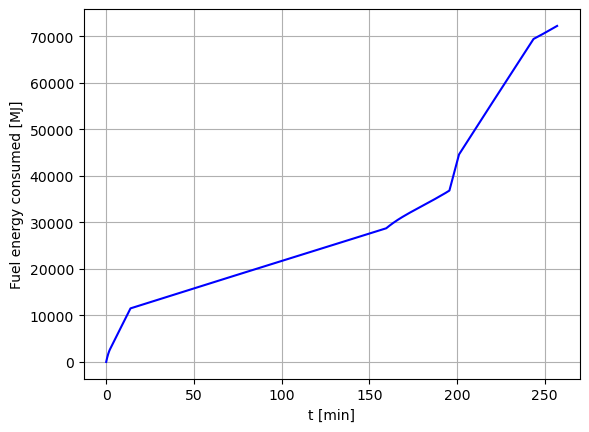

In [84]:
plt.plot(times/60,Ef/1e6, 'b')
#plt.plot(myaircraft.mission.profile.Breaks,np.ones(6)*0.05, '*')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Fuel energy consumed [MJ]')
plt.savefig('../outputs/FuelEnergyConsumed.png', dpi=600, bbox_inches='tight')

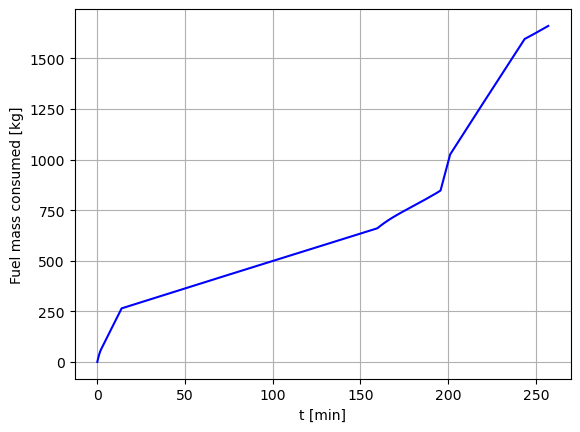

In [82]:
plt.plot(times/60,Ef/myaircraft.weight.ef, 'b')
#plt.plot(myaircraft.mission.profile.Breaks,np.ones(6)*0.05, '*')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Fuel mass consumed [kg]')
plt.savefig('../outputs/FuelMassConsumed.png', dpi=600, bbox_inches='tight')

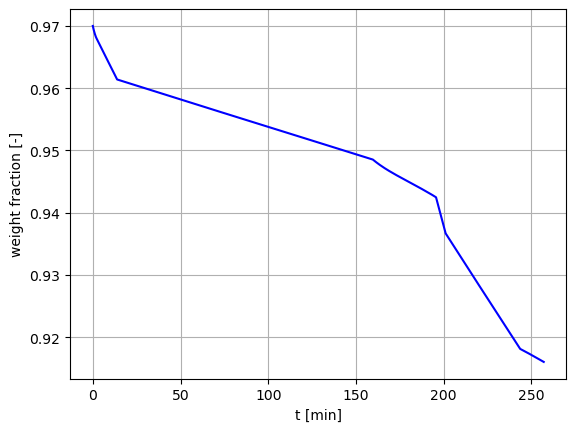

In [83]:
plt.plot(times/60,beta, 'b')
#plt.plot(myaircraft.mission.profile.Breaks,np.ones(6)*0.05, '*')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('weight fraction [-]')
plt.savefig('../outputs/WeightFraction.png', dpi=600, bbox_inches='tight')